In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
comments_path = 'data/comments_-32182751.pkl'
users_path = 'data/users_-32182751.pkl'

In [4]:
with open(comments_path, 'rb') as f:
    comments = pickle.load(f)
with open(users_path, 'rb') as f:
    users = pickle.load(f)

In [5]:
comments_df = pd.DataFrame(comments)

In [6]:
comments_df.head()

,attachments,comment_id,date,from_id,likes,owner_id,reply_to_cid,reply_to_uid,text
0,None,3481302,1477935220,255518914,17,-32182751,None,None,Можно удалять репост)).
1,None,3481303,1477935225,166267984,59,-32182751,None,None,"Кругом обман, уйду в тумааан"
2,None,3481307,1477935303,313942764,7,-32182751,None,None,Ниче нового..ну хоть репост уже можно удалить
3,"[{'type': 'photo', 'photo': {'album_id': -8, '...",3481309,1477935316,204588922,14,-32182751,None,None,Мой братан - тлен
4,None,3481310,1477935330,306333205,4,-32182751,None,None,"Поздравляю, Анастасия!"


In [7]:
comments_df.shape

(2766029, 9)

# Preparing data

In [8]:
def university_cond(user):
    return len(user.get('universities', [])) == 1

In [9]:
def faculty_cond(user):
    return user['universities'][0].get('faculty_name') is not None

In [10]:
users_with_univ = list(filter(university_cond, users))
users_with_fac = list(filter(faculty_cond, users_with_univ))

In [11]:
len(users_with_univ), len(users_with_fac)

(13966, 11012)

In [12]:
users_with_fac[3]

{'activities': 'СМП',
 'bdate': '12.1.1985',
 'books': 'Библия, Иоанн Златоуст, "Человек перед Богом" митрополит Антоний Сурожский, "Братья Карамазовы" Достоевский, "Кирза" Чекунов, "На западном фронте без перемен" Ремарк, "Евгений Онегин"',
 'can_see_all_posts': 0,
 'can_see_audio': 0,
 'can_write_private_message': 0,
 'first_name': 'Konstantin',
 'id': 146538596,
 'interests': '',
 'last_name': 'Malyshev',
 'movies': 'Исчезнувшая 2014',
 'music': '',
 'occupation': {'name': 'ЦРБ', 'type': 'work'},
 'personal': {'alcohol': 3,
  'inspired_by': 'голод и холод',
  'political': 4,
  'religion': 'Православие',
  'smoking': 1},
 'relation': 4,
 'sex': 2,
 'status': 'Откровение настолько нереально, что вера в него - это заслуга. И настолько реально, что неверие в него - это вина.\n\nКарл Ясперс.',
 'universities': [{'chair': 2039002,
   'chair_name': 'Теологии',
   'city': 10719,
   'country': 1,
   'education_form': 'Full-time',
   'faculty': 36704,
   'faculty_name': 'Институт психолого-пе

In [13]:
users_ = []
for u in users_with_fac:
    u.pop('occupation', None)
    u.pop('relation_partner', None)
    univ = u.pop('universities')[0]
    u.update({'univ_name': univ['name'], 'faculty_name': univ['faculty_name'],
              'education_form': univ.get('education_form'), 'education_status': univ.get('education_status'),
              'graduation': univ.get('graduation')})
    pers = u.pop('personal')
    if pers:
        u.update({'political': pers.get('political'), 'langs': ','.join(pers.get('langs', [])),
                  'religion': pers.get('religion'), 'inspired_by': pers.get('inspired_by'),
                  'people_main': pers.get('people_main'), 'life_main': pers.get('life_main'),
                  'smoking': pers.get('smoking'), 'alcohol': pers.get('alcohol')})
    users_.append(u)

In [14]:
users_[0]

{'activities': '',
 'bdate': '21.10',
 'books': '',
 'can_see_all_posts': 0,
 'can_see_audio': 1,
 'can_write_private_message': 1,
 'education_form': None,
 'education_status': None,
 'faculty_name': 'Факультет телерадиожурналистики',
 'first_name': 'Ivan',
 'graduation': None,
 'id': 25165865,
 'interests': '',
 'last_name': 'Loginovskikh',
 'movies': '',
 'music': '',
 'relation': 0,
 'sex': 2,
 'status': '',
 'univ_name': 'ГУ\r\n'}

In [15]:
users_df = pd.DataFrame(users_)

In [16]:
with open('ing__.txt', 'w') as f:
    f.writelines('\n'.join(users_df.faculty_name.value_counts()[(users_df.faculty_name.value_counts() > 4)].keys().values))

In [17]:
(users_df.faculty_name.value_counts() > 4).sum()

244

In [18]:
users_df.faculty_name.value_counts()[(users_df.faculty_name.value_counts() > 4)].values.sum()

9411

In [19]:
with open('ing.txt', 'r') as f:
    ing = [line.strip() for line in f.readlines()]
with open('gum.txt', 'r') as f:
    gum = [line.strip() for line in f.readlines()]

In [20]:
ing[:3], gum[:3]

(['Экономический факультет',
  'Экономический',
  'Факультет прикладной математики, информатики и механики'],
 ['Юридический факультет',
  'Экономики и управления',
  'Экономика и управление на предприятии'])

In [20]:
users_df['is_gum'] = None

In [21]:
def get_is_gum(name):
    name = name.strip()
    if name in gum:
        return 1
    elif name in ing:
        return 0
    else: return None

In [26]:
users_df['is_gum'] = users_df.faculty_name.apply(get_is_gum)

In [27]:
users_df.dropna(subset=['is_gum'], inplace=True)

In [28]:
users_df.is_gum.value_counts()

1.0    4349
0.0    2744
Name: faculty_name, dtype: int64

In [29]:
users_df.columns

Index(['activities', 'alcohol', 'bdate', 'books', 'can_see_all_posts',
       'can_see_audio', 'can_write_private_message', 'education_form',
       'education_status', 'faculty_name', 'first_name', 'graduation', 'id',
       'inspired_by', 'interests', 'langs', 'last_name', 'life_main', 'movies',
       'music', 'people_main', 'political', 'relation', 'religion', 'sex',
       'smoking', 'status', 'status_audio', 'univ_name', 'is_gum'],
      dtype='object')

# Demographic

## Sex

In [30]:
users_vc = users_df.is_gum.value_counts()
users_vc

1.0    4349
0.0    2744
Name: faculty_name, dtype: int64

In [31]:
delta = users_vc[1] - users_vc[0]
delta

1605

In [32]:
index_to_del = np.random.choice(users_df[users_df.is_gum == 1].index, delta, replace=False)

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


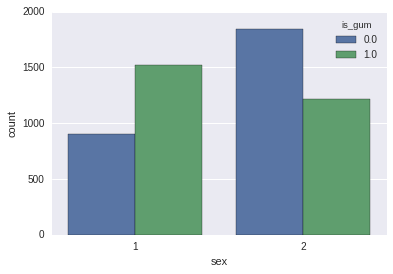

In [33]:
g = sns.countplot(x='sex', hue='is_gum',  data=users_df.drop(index_to_del))

## Alcohol

In [34]:
alcohol_df = users_df.dropna(subset=['alcohol'])
alcohol_vc = alcohol_df.is_gum.value_counts()
alcohol_vc

1.0    1677
0.0    1109
Name: is_gum, dtype: int64

In [35]:
delta = alcohol_vc[1] - alcohol_vc[0]
delta

568

In [36]:
index_to_del = np.random.choice(alcohol_df[alcohol_df.is_gum == 1].index, delta, replace=False)
alcohol_df.drop(index_to_del, inplace=True)
alcohol_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1109
0.0    1109
Name: is_gum, dtype: int64

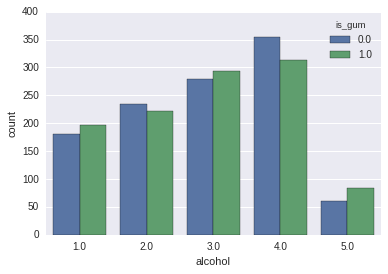

In [37]:
g = sns.countplot(x='alcohol', hue='is_gum',  data=alcohol_df)

## Smoking

In [38]:
smoking_df = users_df.dropna(subset=['smoking'])
smoking_vc = smoking_df.is_gum.value_counts()
smoking_vc

1.0    1731
0.0    1148
Name: is_gum, dtype: int64

In [39]:
delta = smoking_vc[1] - smoking_vc[0]
delta

583

In [40]:
index_to_del = np.random.choice(smoking_df[smoking_df.is_gum == 1].index, delta, replace=False)
smoking_df.drop(index_to_del, inplace=True)
smoking_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1148
0.0    1148
Name: is_gum, dtype: int64

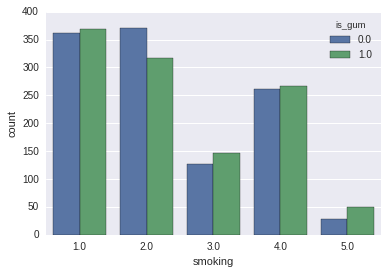

In [41]:
g = sns.countplot(x='smoking', hue='is_gum',  data=smoking_df)

## Political

In [42]:
political_df = users_df.dropna(subset=['political'])
political_vc = political_df.is_gum.value_counts()
political_vc

1.0    1505
0.0    1009
Name: is_gum, dtype: int64

In [44]:
delta = political_vc[1] - political_vc[0]
delta

496

In [45]:
index_to_del = np.random.choice(political_df[political_df.is_gum == 1].index, delta, replace=False)
political_df.drop(index_to_del, inplace=True)
political_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1009
0.0    1009
Name: is_gum, dtype: int64

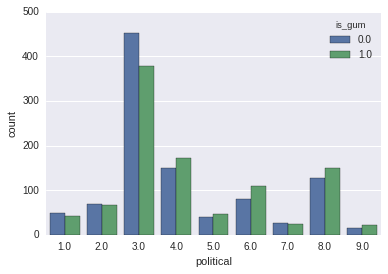

In [46]:
g = sns.countplot(x='political', hue='is_gum',  data=political_df)

## Relation

In [47]:
relation_df = users_df.dropna(subset=['relation'])
relation_vc = relation_df.is_gum.value_counts()
relation_vc

1.0    4349
0.0    2744
Name: is_gum, dtype: int64

In [48]:
delta = relation_vc[1] - relation_vc[0]
delta

1605

In [49]:
index_to_del = np.random.choice(relation_df[relation_df.is_gum == 1].index, delta, replace=False)
relation_df.drop(index_to_del, inplace=True)
relation_df.is_gum.value_counts()

1.0    2744
0.0    2744
Name: is_gum, dtype: int64

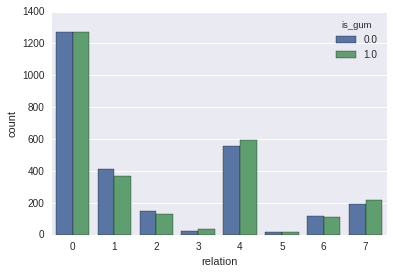

In [50]:
g = sns.countplot(x='relation', hue='is_gum',  data=relation_df)

## Life-main

In [51]:
life_main_df = users_df.dropna(subset=['life_main'])
life_main_vc = life_main_df.is_gum.value_counts()
life_main_vc

1.0    1756
0.0     999
Name: is_gum, dtype: int64

In [52]:
delta = life_main_vc[1] - life_main_vc[0]
delta

757

In [53]:
index_to_del = np.random.choice(life_main_df[life_main_df.is_gum == 1].index, delta, replace=False)
life_main_df.drop(index_to_del, inplace=True)
life_main_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    999
0.0    999
Name: is_gum, dtype: int64

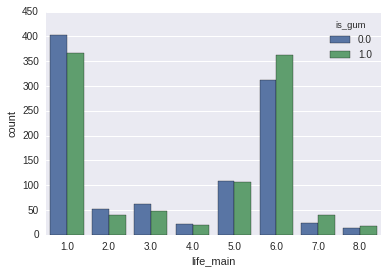

In [54]:
g = sns.countplot(x='life_main', hue='is_gum',  data=life_main_df)

## People-main

In [55]:
people_main_df = users_df.dropna(subset=['people_main'])
people_main_vc = people_main_df.is_gum.value_counts()
people_main_vc

1.0    1781
0.0    1073
Name: is_gum, dtype: int64

In [56]:
delta = people_main_vc[1] - people_main_vc[0]
delta

708

In [57]:
index_to_del = np.random.choice(people_main_df[people_main_df.is_gum == 1].index, delta, replace=False)
people_main_df.drop(index_to_del, inplace=True)
people_main_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1073
0.0    1073
Name: is_gum, dtype: int64

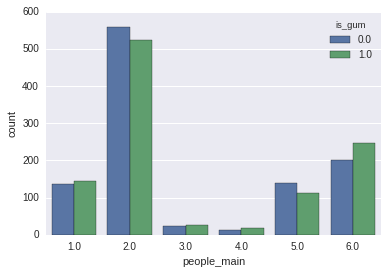

In [58]:
g = sns.countplot(x='people_main', hue='is_gum',  data=people_main_df)

## Month

In [59]:
users_df.bdate = pd.to_datetime(users_df.bdate, errors='coerce')

In [60]:
bdate_df = users_df.dropna(subset=['bdate'])

In [61]:
bdate_vc = bdate_df.is_gum.value_counts()
bdate_vc

1.0    2415
0.0    1548
Name: is_gum, dtype: int64

In [62]:
delta = bdate_vc[1] - bdate_vc[0]
delta

867

In [63]:
index_to_del = np.random.choice(bdate_df[bdate_df.is_gum == 1].index, delta, replace=False)
index_to_del.shape

(867,)

In [64]:
bdate_df.drop(index_to_del, inplace=True)
bdate_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1.0    1548
0.0    1548
Name: is_gum, dtype: int64

In [65]:
bdate_df['bmonth'] = bdate_df.bdate.apply(lambda x: x.month if x else x)

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


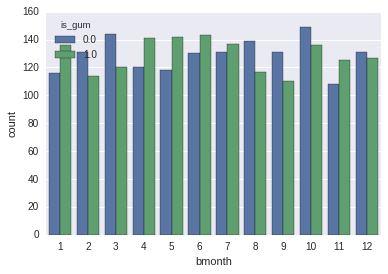

In [66]:
g = sns.countplot(x='bmonth', hue='is_gum',  data=bdate_df)

# Comments

In [67]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766029 entries, 0 to 2766028
Data columns (total 9 columns):
attachments     object
comment_id      int64
date            int64
from_id         int64
likes           int64
owner_id        object
reply_to_cid    object
reply_to_uid    object
text            object
dtypes: int64(4), object(5)
memory usage: 189.9+ MB


In [68]:
comments_merged = comments_df.merge(users_df[['id', 'is_gum', 'sex']], left_on='from_id', right_on='id', how='inner')

### Generating hour from comment date

In [69]:
comments_merged['hour'] = comments_merged.date.apply(lambda x: datetime.fromtimestamp(x).hour)

In [70]:
comments_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132681 entries, 0 to 132680
Data columns (total 13 columns):
attachments     6220 non-null object
comment_id      132681 non-null int64
date            132681 non-null int64
from_id         132681 non-null int64
likes           132681 non-null int64
owner_id        132681 non-null object
reply_to_cid    0 non-null object
reply_to_uid    0 non-null object
text            132681 non-null object
id              132681 non-null int64
is_gum          132681 non-null float64
sex             132681 non-null int64
hour            132681 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 14.2+ MB


In [71]:
comments_merged.head()

,attachments,comment_id,date,from_id,likes,owner_id,reply_to_cid,reply_to_uid,text,id,is_gum,sex,hour
0,None,3481611,1477939228,56343863,0,-32182751,None,None,Я один не вижу её в подписчиках?,56343863,0.0,2,21
1,None,3482261,1477978615,4901340,1,-32182751,None,None,"[id262927831|Семён], ей даже за бабки никто св...",4901340,0.0,2,8
2,None,3444860,1476337936,4901340,31,-32182751,None,None,"Ебаные дибилы дело блять не в растает,а темпер...",4901340,0.0,2,8
3,None,3444866,1476338083,4901340,0,-32182751,None,None,"[id4071604|Марина], да не гребу,я чисто кто в ...",4901340,0.0,2,8
4,None,3444872,1476338214,4901340,0,-32182751,None,None,"[id4071604|Марина], бесспорно",4901340,0.0,2,8


In [72]:
comments_merged.sex.value_counts()

2    78855
1    53826
Name: sex, dtype: int64

## Nice plot

In [74]:
comments_merged['Гумманитарий'] = comments_merged.is_gum

In [75]:
comments_merged.Гумманитарий = comments_merged.Гумманитарий.map({0: False, 1: True})

In [76]:
merged_vc = comments_merged.is_gum.value_counts()
merged_vc

1.0    76006
0.0    56675
Name: is_gum, dtype: int64

In [77]:
delta = merged_vc[1] - merged_vc[0]
delta

19331

In [78]:
index_to_del = np.random.choice(comments_merged[comments_merged.is_gum == 1].index, delta, replace=False)

In [79]:
merged_ = comments_merged.drop(index_to_del)
merged_.is_gum.value_counts()

1.0    56675
0.0    56675
Name: is_gum, dtype: int64

In [80]:
%matplotlib inline

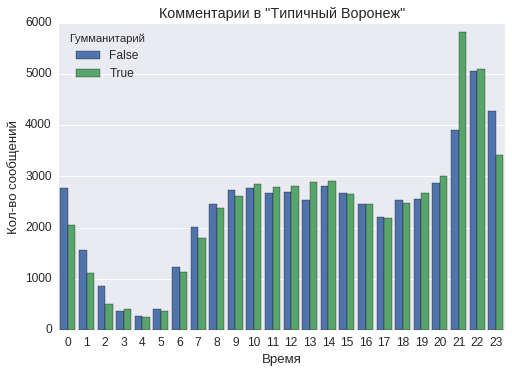

In [81]:
sns.set(font_scale=1.2)
g = sns.countplot(x='hour', hue='Гумманитарий', data=merged_, saturation=0.9)
g.set_ylabel('Кол-во сообщений')
g.set_xlabel('Время')
plt.title('Комментарии в "Типичный Воронеж"')


## Another

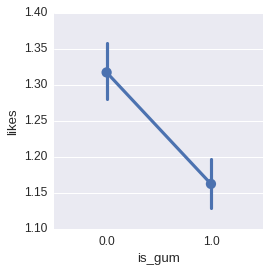

In [82]:
sns.factorplot(x='is_gum', y='likes', data=merged_)

## Saving

In [85]:
index_to_del = merged_[merged_.text == ''].index
merged_.drop(index_to_del, inplace=True)
merged_.shape

(109529, 14)

In [86]:
merged_[['from_id', 'text', 'is_gum', 'hour', 'likes', 'sex']].to_csv('data/comments.csv.gz',
                                                                       index=False, compression='gzip')